# Age prediction with major features from Cam-CAN

In [1]:
import numpy as np
from camcan.datasets import load_camcan_behavioural

path_data = '/home/lemaitre/Documents/data/camcan/cc700-scored/total_score.csv'
path_participants_info = '/home/lemaitre/Documents/data/camcan/cc700-scored/participant_data.csv'
path_selected_features = "/home/lemaitre/Documents/data/camcan/cc700-scored/features"

# load the interesting features
features_name = ['Observations']
with open(path_selected_features, mode="rt", encoding="utf-8") as f:
    for row in f:
        features_name.append(row.strip())

dataset = load_camcan_behavioural(path_data, path_participants_info, column_selected=features_name)

X = dataset.data
y = dataset.scores.age

In [2]:
from sklearn.preprocessing import Imputer
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.svm import LinearSVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score, median_absolute_error
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(Imputer(), Ridge())
y_pred = cross_val_predict(pipeline, X, y, cv=KFold(n_splits=10, shuffle=True))

print('R2 score: {}'.format(r2_score(y, y_pred)))
print('Median absolute deviation score: {}'.format(median_absolute_error(y, y_pred)))

R2 score: 0.6196705546968193
Median absolute deviation score: 7.229798676080932


/home/lemaitre/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


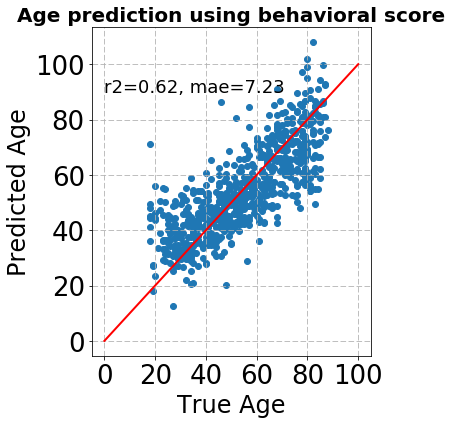

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

f = plt.figure(figsize=(6, 6))
ax = f.gca()
ax.scatter(y, y_pred)
ax.plot([0, 100], [0, 100], 'r', linewidth=2)
ax.grid(linestyle='--')
xlabels = ['%u' % x for x in ax.get_xticks()]
ax.set_xticklabels(xlabels, fontsize=26)
labels = ['%u' % x for x in ax.get_yticks()]
ax.set_yticklabels(labels, fontsize=26)
ax.set_ylabel('Predicted Age', fontsize=24)
ax.set_xlabel('True Age', fontsize=24)
ax.text(0, 90, 'r2=%.2f, mae=%.2f' % (r2_score(y, y_pred), median_absolute_error(y, y_pred)),
        fontsize=18)
ax.set_title('Age prediction using behavioral score',
             fontsize=20, fontweight='bold')
f.tight_layout()
f.show()

# Per experiment analysis

In [ ]:
import numpy as np
from camcan.datasets import load_camcan_behavioural_feature
from camcan.datasets import load_camcan_behavioural

path_data = '/home/lemaitre/Documents/data/camcan/cc700-scored/total_score.csv'
path_participants_info = '/home/lemaitre/Documents/data/camcan/cc700-scored/participant_data.csv'
path_selected_features = "/home/lemaitre/Documents/data/camcan/cc700-scored/behavioural_features.json"

experiment_feature = load_camcan_behavioural_feature()

dataset = load_camcan_behavioural(path_data, path_participants_info, column_selected=features_name)

X = dataset.data
y = dataset.scores.age